use MUDE BASE KERNEL

Dredging Tutorial 2

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil

pd.options.display.float_format = '{:,}'.format# show , for thousands
pd.set_option('display.max_columns', 1000)# show all columns

from pathlib import Path

# change the width of the cells on screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

,Hs [m]
time,
2012-01-01 00:00:00,1.49262272910131
2012-01-01 01:00:00,1.5640411142480894
2012-01-01 02:00:00,1.609562005568361
2012-01-01 03:00:00,1.636151963909651
2012-01-01 04:00:00,1.6389448705755278


Text(0.5, 0, 'Time [yr]')

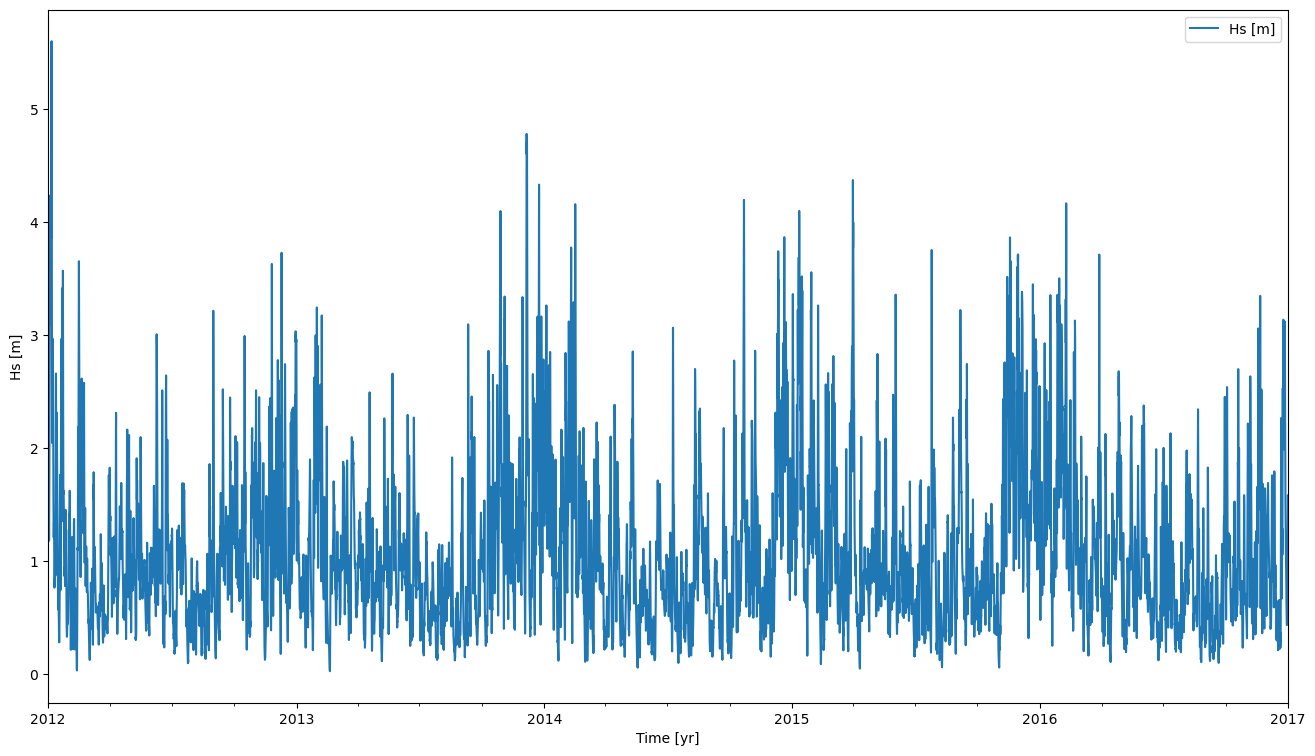

In [150]:
path = Path.cwd()
eurpfm = pd.read_csv(Path.joinpath(path, "Waves_Safe_Haven.csv"), delimiter = ',')
eurpfm['time'] = pd.to_datetime(eurpfm['time'], format='%Y-%m-%d %H:%M:%S')
eurpfm.set_index(['time'], inplace = True)

display(eurpfm.head(5))
eurpfm.plot(figsize=(16,9),subplots=True);
plt.ylabel('Hs [m]')
plt.xlabel('Time [yr]')

**1) Long Term Statistical Analysis**
\
Mean and Standard Deviation

In [151]:
mean_overal = eurpfm.mean()
print('Mean')
print(mean_overal, "\n", )

print('Standard deviation')
std_overal = eurpfm.std()
print(std_overal)

describe_overal = eurpfm.describe()
display(describe_overal)

Mean
Hs [m]   1.061542415648853
dtype: float64 

Standard deviation
Hs [m]   0.687480264420601
dtype: float64


,Hs [m]
count,"43,849.0"
mean,1.061542415648853
std,0.687480264420601
min,0.0222928343042532
25%,0.5714801201810078
50%,0.8987112186288736
75%,1.378929252118326
max,5.5994025975807205


Monthly mean and Standard deviation

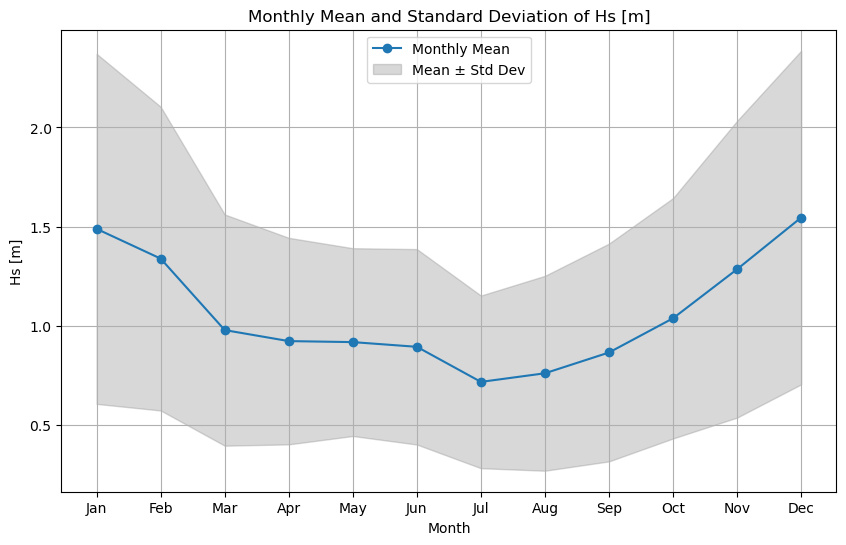

In [152]:
# Group by month (1-12) and calculate mean and std dev for each calendar month across all years
monthly_mean = eurpfm.groupby(eurpfm.index.month).mean()
monthly_std = eurpfm.groupby(eurpfm.index.month).std()

plt.figure(figsize=(10,6))
plt.plot(monthly_mean.index-1, monthly_mean['Hs [m]'], marker='o', label='Monthly Mean')
plt.fill_between(monthly_mean.index-1,
                 monthly_mean['Hs [m]'] - monthly_std['Hs [m]'],
                 monthly_mean['Hs [m]'] + monthly_std['Hs [m]'],
                 color='gray', alpha=0.3, label='Mean ± Std Dev')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=months)
plt.xlabel('Month')
plt.ylabel('Hs [m]')
plt.title('Monthly Mean and Standard Deviation of Hs [m]')
plt.legend()
plt.grid(True)
plt.show()

**2)Long-Term assessment**
\
2.1 Workability

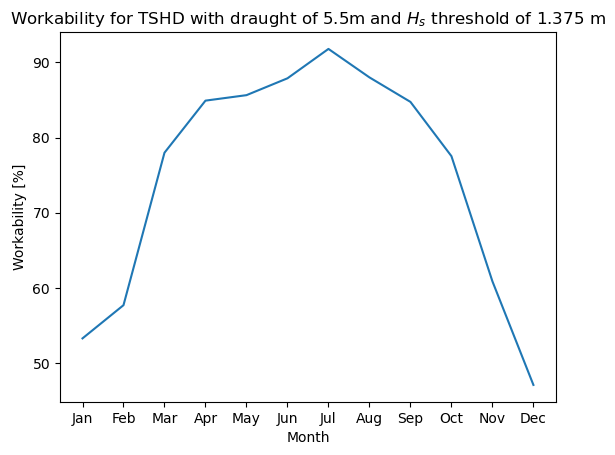

In [153]:
draught= 5.5  #CHANGE WITH BOATS
Hs_thres = 0.25 *draught  #CHANGE WITH BOAT DRAUGHT
work_ability = []

for month in range(1,12+1,1):
    data_month = eurpfm[eurpfm.index.month == month].copy()
    n_all = len(data_month)
    
    data_month = data_month[data_month['Hs [m]'] <= Hs_thres]
    n_workable = len(data_month)
    
    work_ability.append(n_workable/n_all*100)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(work_ability);
plt.title('Workability for TSHD with draught of '+str(draught)+'m and $H_s$ threshold of '+str(Hs_thres)+' m');
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Workability [%]');

Downtime

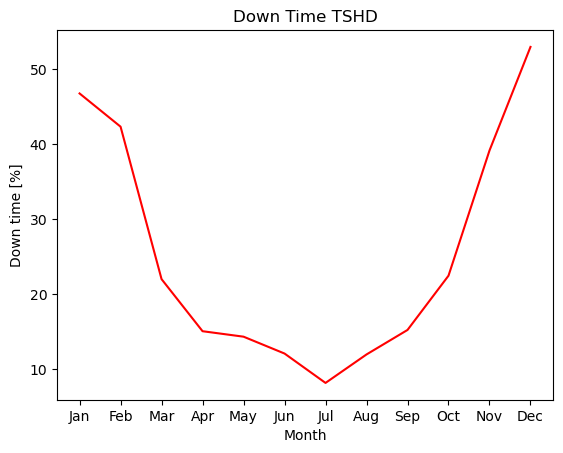

In [154]:
down_time = 100 - np.array(work_ability)

plt.plot(down_time, 'r');
plt.title('Down Time TSHD')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Down time [%]');

2.2) Presistency

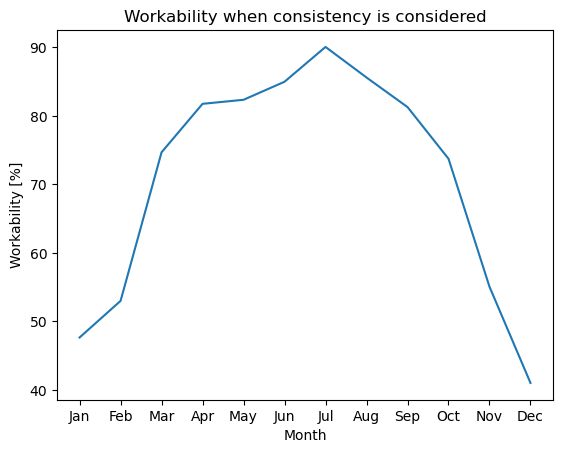

In [155]:
month_assessed = np.zeros(12)# an array that counts how many times each month is reviewed.
month_succes = np.zeros(12)# an array that will count the number of time 6 consequetive hours are occuring


for i in range(len(eurpfm)):
    period = eurpfm.iloc[i:i+6]
    
    month = period.index[0].month
    month_assessed[month-1] += 1# to zero-based

    Hs_serie = period['Hs [m]'].values.tolist()
 
    if np.max(Hs_serie) <= Hs_thres:    
        month_succes[month-1] += 1  # to zero-based
        #print(i, 'succes, Hs', np.max(Hs_serie))
    #else:
    #    print(i, 'not succes, Hs', np.max(Hs_serie), 'Wl min', np.min(WL_serie))

workability = month_succes/month_assessed*100

plt.plot(workability)
plt.title('Workability when consistency is considered')
plt.xticks(np.linspace(0,11,12), months);
plt.xlabel('Month')
plt.ylabel('Workability [%]');

3) Work method strategy

|Site| Clay [m3] | Sand [m3]| Cemented Sand [m3] |
|----|-----------|----------|--------------------|
|Basin |311196     |461691 | 227923|    
|Channel | 0|248736/yr | 0|       

Basin Deepening

In [156]:
basin_Clay_vol = 311196             # m3
basin_Cemented_Sand_vol = 227923  # m3
basin_Sand_vol = 461691              # m3
# print('Clay volume [m3]:', basin_Clay_vol)
# print('Cemented Sand volume [m3]:', basin_Cemented_Sand_vol)
# print('Sand volume [m3]:', basin_Sand_vol)

4) Spillage of fines during production
\
A maximum turbidity level of 10 mg/l

sand or arenitic grain size (0.0625 – 2 mm) and the corresponding sandstone;
– silt or siltitic grain size (0.004 – 0.0625 mm) and the corresponding siltstone;
– clay or lutitic grain size (<0.004 mm), whose lithified counterpart is claystone.

|Sediment | Size [um] |
|----|-----------|
|Sand |> 63 |
|Silt | 4-63|
| Clay |  < 4|   

4.2 Dry Density
\begin{align*}
\rho_d &= (1 - n)\rho_{sed} \\[1.5em]
\rho_{situ} &= \rho_d + n S_r \rho_w
\end{align*}

$S_r$ = saturation index

${\rho}_d$ = dry density

${\rho}_{sed}$ = sediment density

${\rho}_w$ = water density

$n$= porosity


Dry Density

In [157]:
# rho_situ_sand = 2000 # kg/m3
# rho_situ_clay = 1800 # kg/m3
# rho_situ_cemented_sand = 2400 # kg/m3
# rho_w = 1025 # kg/m3
# rho_s = 2650 # kg/m3

def calc_dry_dens(rho_situ, rho_s, rho_w, Srw):
    n = (rho_situ-rho_s)/(Srw*rho_w-rho_s)
    return (1-n)*rho_s

dry_dens_clay = calc_dry_dens(rho_situ = 1800, rho_s = 2650, rho_w = 1025, Srw = 1)
dry_dens_sand = calc_dry_dens(rho_situ = 2000, rho_s = 2650, rho_w = 1025, Srw = 1)
dry_dens_cemented_sand = calc_dry_dens(rho_situ = 2400, rho_s = 2650, rho_w = 1025, Srw = 1)

print('Dry density of clay, sand, cemented sand are:', round(dry_dens_clay,2),',', round(dry_dens_sand,2),'and', round(dry_dens_cemented_sand,2), 'kg/m3')

Dry density of clay, sand, cemented sand are: 1263.85 , 1590.0 and 2242.31 kg/m3


4.3) Spillage of fines without overflow 
\
4.3.1)Barges (Barges for deepening clay disposal)


In [158]:
# clay = 100% fines
mb = basin_Clay_vol * dry_dens_clay /1000
print ('mass of clay excavated from deepening:', round(mb,0), 'tons')

Sb = mb*0.075    #  fraction release ranges from 0-0.1 in table 1 becker 2015
print ('The total spillage at bottom door opening offshore:', round(Sb,0), 'tons')

#DONT NEED THIS CODE FOR DEEPENING WITH CLAY AS WE USE CSD
# print('Spill at the harbor settles at the harbor and has to be re-excavated')

# mh = mb # mass (to) hopper = mass bucket (mass hopper (mh) is mass retained (mr) for no overflow conditions)
# print('Total volume to dispose', mh, 'ton')

# S_dis1 = mh * 0.04
# print('Total offshore disposal spillage clay from BHD:', round(S_dis1,0), 'ton')

mass of clay excavated from deepening: 393304.0 tons
The total spillage at bottom door opening offshore: 29498.0 tons


4.3.4) Spill by CSD for cemented sand
- what is our f0? 0?
- The pipeline transport generates 1% of fines for every 250m of pumping distance. which yields f1. assumption from training session 2.. stick with it?
- CALCULATION CURRENTLY IF WE PUMP CEMENTED SAND OFFSHORE. considering barges to land reclam.

In [164]:
# pipeline_length = 10000 #m
# f0 = 0.05   # initial fraction of fines
# f1 = f0 + 0.01 * pipeline_length/250# fraction fines at dumping site

# def Spillage_basin_2(vol_situ, dry_dens,f0,f1, sig1, sig2):# f is fraction fines, sig1 is fraction spillage excavation, sig2 is fraction spillage disposal
#     mass = basin_Cemented_Sand_vol * dry_dens_cemented_sand/1000 *f0 # mass [ton] excavation
#     s1 = mass * sig1 # spillage excavation
#     mass2 = basin_Cemented_Sand_vol * dry_dens_cemented_sand/1000 *f1# more fine mass due to disintegration
#     s2 = mass2 * sig2# spillage disposal
#     return s1, s2, s1 + s2

# print('The fraction fines at the land reclamation site:', f1)

# c_CSD_CemSand1 = Spillage_basin_2(basin_Cemented_Sand_vol, dry_dens_cemented_sand, f0=f0, f1 = f1, sig1 = 0.04, sig2 = 0.05)

# print('Cem. sand spillage in basin:', round(c_CSD_CemSand1[0]*0.5*0.9,0), 'at land reclamation site:', round(c_CSD_CemSand1[1]*0.5,0), 'ton')  # *0.5 for bubble efficiency of bubble screen and 0.9 for CSD cut ratio


4.3.5) Overview of total and weekly spillage

In [165]:
# answer starts here, dont delete cell above

# project = pd.DataFrame()
# project['Soil'] = ['clay', 'clay', 'clay', 'sand', 'sand', 'cemented sand', 'cemented sand']
# project['site'] = ['basin', 'basin', 'channel', 'basin', 'channel', 'basin', 'channel']
# project['Equipment'] = ['BHD', 'TSHD', 'TSHD', 'CSD', 'CSD', 'CSD', 'CSD']
# project['in-situ vol [m3]'] = [150000, 748000, 1378000, 3900000, 290000,1452000, 232000]
# project['production [m3/week]'] =[42000, 127000, 127000, 252000, 252000,150000, 150000]
# project['fines [ton]'] =[Sb + S_dis1, s_TSHD1[2],s_TSHD2[2], s_CSD_Sand1[2], s_CSD_Sand2[2], c_CSD_CemSand1[2], c_CSD_CemSand2[2]]# spillage in harbour is included
# project['fines (excl harbour) [ton]'] = [S_dis1, s_TSHD1[1],s_TSHD2[2], s_CSD_Sand1[1], s_CSD_Sand2[2], c_CSD_CemSand1[1], c_CSD_CemSand2[2]]# spillage in harbour is included

# project_rounded = project.round({'fines [ton]': 0, 'fines (excl harbour) [ton]':0})# for visualization purposes
# display(project_rounded)

Total Spillage with and without harbor

In [166]:
# Total_spill_including_harbor = project['fines [ton]'].sum()
# Total_spill_excluding_harbor = project['fines (excl harbour) [ton]'].sum()
# print('The total spillage, including at the harbor:', round(Total_spill_including_harbor,0), 'ton')

# print('The total spillage, excluding at the harbor:', round(Total_spill_excluding_harbor,0), 'ton')
# print('Spills inside the harbour/basin does not enter the environment, so it should not be an environmental problem. \nIt can be assumed to enter the environment to be on the safe side.')

# print('\nThe spillage does not exceed the limit of 675000 tons, in both cases.')

Optional code in training session for spills per week

4.4.1) Fines released from dredging without overflow

**5) Energy consumption and emissions**
\
required energy and the release of a emmissions on a very basic level for dredging and disposing clay with one or multiple TSHD's.

5.1.2) Hydraulic power for dredging
- Q = flowrate in m3/s
- H = headof pump underwater in m
- eta = pump efficiency
- rho_m = density of dredged material

In [167]:
def calc_P(Q,H,rho_m,eta):
    return Q*H*rho_m*9.81/eta

# 3600 m3/h = 1m3/s
P_dredge_TSHD = 940000 #calc_P(Q = 1140/3600,H = 25, rho_m = 2000,eta = 0.8)
P_dredge_CSD = calc_P(Q = 4819/3600,H = 25, rho_m = 2100,eta = 0.8)
print('The required hydraulic power for TSHD dredging', round(P_dredge_TSHD/1e3,0), 'kW')
print('The required hydraulic power for CSD dredging', round(P_dredge_CSD/1e3,0), 'kW')

The required hydraulic power for TSHD dredging 940.0 kW
The required hydraulic power for CSD dredging 862.0 kW


5.1.3) Required energy for dredging

In [168]:
t_dredge_TSHD = 115.4 / 60 * (906+1101)  #minutes/60 * number of cycles #t in hours
t_dredge_CSD = 100 /60 * 2000   #hours  REVIEW LATER
E_dredge_TSHD = t_dredge_TSHD * P_dredge_TSHD
E_dredge_CSD = t_dredge_CSD * P_dredge_CSD
print('The required energy for TSHD dredging is', round(E_dredge_TSHD/1e6,0),'MJ')
print('The required energy for CSD dredging is', round(E_dredge_CSD/1e6,0),'MJ')

The required energy for TSHD dredging is 3629.0 MJ
The required energy for CSD dredging is 2873.0 MJ


5.1.4) Required energy for propulsion system
- Assume that 200 kW is required to keep the vessel in place

In [169]:
E_dredge_propulsion_TSHD = 200000* t_dredge_TSHD *60
E_dredge_propulsion_CSD = 200000* t_dredge_CSD *60
print('The thruster require:', E_dredge_propulsion_TSHD/1e6, 'MJ')
print('The thruster require:', E_dredge_propulsion_CSD/1e6, 'MJ')

The thruster require: 46321.56 MJ
The thruster require: 40000.00000000001 MJ


5.2) Sailing
we assume that the resistance experienced by a ship is linearly related to the sailing speed (v), with a constant (C) which is estimated to be 450 SJ/m2 for sailing unloaded and 700 sJ/m2 when it is loaded, as in formula 5.2. The expression for the required power (P) to get a certain speed is described in formula 5.2b.

$R = Cv^2$
\
$P= Rv = Cv^3$

full speed 6.0 m/s
empty speed 7.0 m/s
151.2


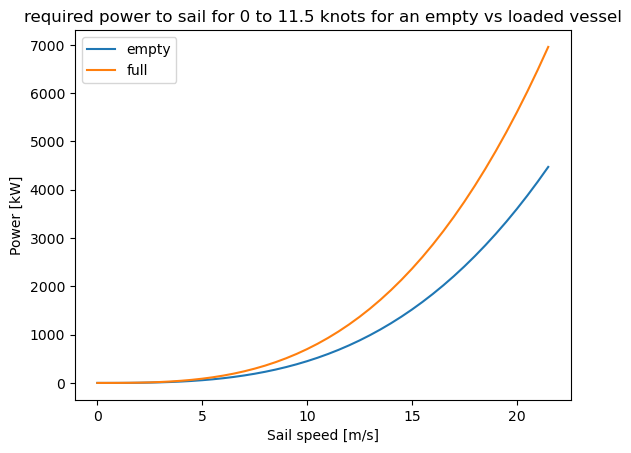

In [170]:
#FOR TSHD easy dredge 2700
def calc_P_sail(v,c):
    return c * v**3

v_serie = np.arange(0,11.5*1.852+0.5,0.5) #1knot = 1.852km/h

P_empty_easydredge2700 =[]
P_full_easydredge2700 = []
for v in v_serie:
    P_empty_easydredge2700.append(calc_P_sail(v,450)/1000)
    P_full_easydredge2700.append(calc_P_sail(v,700)/1000)

plt.plot(v_serie,P_empty_easydredge2700, label = 'empty')
plt.plot(v_serie,P_full_easydredge2700, label = 'full')
plt.title('required power to sail for 0 to 11.5 knots for an empty vs loaded vessel')
# plt.plot(v_serie[24], P_full[24], 'ro')
# plt.xlim(0,10)
plt.legend();
plt.ylabel('Power [kW]')
plt.xlabel('Sail speed [m/s]');

print('full speed', v_serie[12], 'm/s')
print('empty speed', v_serie[14], 'm/s')
print(P_full_easydredge2700[12])

full speed 6.0 m/s
empty speed 7.0 m/s
151.2 and 154.35


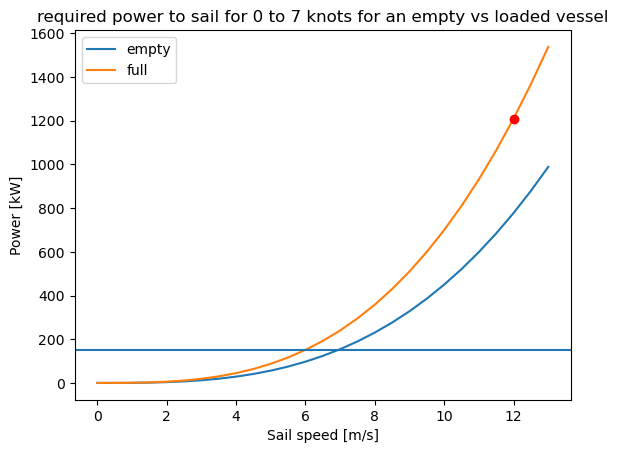

In [171]:
#FOR BARGE A in CSD process
def calc_P_sail(v,c):
    return c * v**3

v_serie = np.arange(0,7*1.852+0.5,0.5) #1knot = 1.852km/h

P_empty_bargeA =[]
P_full_bargeA = []
for v in v_serie:
    P_empty_bargeA.append(calc_P_sail(v,450)/1000)
    P_full_bargeA.append(calc_P_sail(v,700)/1000)

plt.plot(v_serie,P_empty_bargeA, label = 'empty')
plt.plot(v_serie,P_full_bargeA, label = 'full')
plt.title('required power to sail for 0 to 7 knots for an empty vs loaded vessel')
plt.plot(v_serie[24], P_full_bargeA[24], 'ro')
plt.legend();
plt.axhline(151)
plt.ylabel('Power [kW]')
plt.xlabel('Sail speed [m/s]');

print('full speed', v_serie[12], 'm/s')
print('empty speed', v_serie[14], 'm/s')
print(P_full_bargeA[12], 'and', P_empty_bargeA[14])

Total energy for barge sailing is 3004.0 GJ


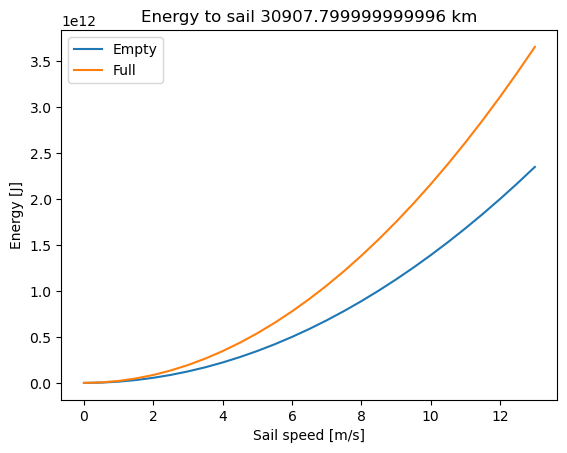

In [172]:
def calc_E_sail(s, v, c_sail):
    P_sail = c_sail*v**3
    t = s/v
    return P_sail * t

v_serie = np.arange(0.001,7*1.852+0.5,0.5)

E_empty =[]
E_full = []

s = (906 + 1101) * 22000 * 0.7 #TO SAIL 22km for 2007 times  (GUESS 70% taken offshore rest to land reclamation)

for v in v_serie:
    E_empty.append(calc_E_sail(s, v=v, c_sail=450))    
    E_full.append( calc_E_sail(s, v=v, c_sail=700))
    
plt.plot(v_serie, E_empty, label = 'Empty')
plt.plot(v_serie, E_full, label = 'Full')
plt.title(f'Energy to sail {s/1000} km')
plt.legend()
plt.xlabel('Sail speed [m/s]')
plt.ylabel('Energy [J]');

# print(v_serie)
barge_total_energy = (E_empty[26] + E_full[26]) / 2
print('Total energy for barge sailing is', round(barge_total_energy/1e9,0), 'GJ')

5.4) Maneuvers

In [173]:
# v = knots * 1.852 km/hr
# c = constant. if empty c=450 SJ/m2, if full c=700 SJ/m2
t = 5*60 # 5 min * 60 sec

E_maneuvre_empty = calc_P_sail(v=8*1.852,c=450) * (t) # P_sail(8 knots) * t
E_maneuvre_full = calc_P_sail(v=4*1.852,c=700) * (t)
print('Energy use while Empty:', round( E_maneuvre_empty,0) , 'W')
print('Energy use while Full:',  round( E_maneuvre_full, 0) , 'W')

Energy use while Empty: 439062834.0 W
Energy use while Full: 85373329.0 W


Based on Number of trips

In [174]:
#TSHD                =   cycles   *  energy per cycle
E_sailing_total_TSHD = (906 + 1101) * (P_full_easydredge2700[14] + P_empty_easydredge2700[14])
#Barges for CSD
E_sailing_total_CSD = barge_total_energy
print('Total energy for TSHD sailing is', round(E_sailing_total_TSHD/1e9,0), 'GJ')
print('Total energy for CSD sailing is', round(E_sailing_total_CSD/1e9,0), 'GJ')

Total energy for TSHD sailing is 0.0 GJ
Total energy for CSD sailing is 3004.0 GJ


5.5) Energy consumption of total project

In [175]:
Eneregy_TSHD_sum = E_dredge_TSHD + E_dredge_propulsion_TSHD + E_sailing_total_TSHD
Eneregy_CSD_sum = E_dredge_CSD + E_dredge_propulsion_CSD + E_sailing_total_CSD


In [176]:
# create a summary table of energy by type for TSHD and CSD and show column totals
energy = {
    'TSHD [J]': [E_dredge_TSHD, E_dredge_propulsion_TSHD, E_sailing_total_TSHD],
    'CSD  [J]': [E_dredge_CSD,    E_dredge_propulsion_CSD,    E_sailing_total_CSD],
}
rows = ['Dredge', 'Propulsion', 'Sailing']

df_energy = pd.DataFrame(energy, index=rows)
df_energy.loc['Total'] = df_energy.sum()

# Display nicely formatted
display(df_energy.style.format('{:,.0f}'))

,TSHD [J],CSD [J]
Dredge,"3,628,522,200","2,872,575,781"
Propulsion,"46,321,560,000","40,000,000,000"
Sailing,"791,661","3,003,927,554,382"
Total,"49,950,873,861","3,046,800,130,163"


5.5.1) One vessel at high sailing speed

5.5.2) Multiple vessels

5.6) Release of emissions

In [177]:
r = (220+700)/2
print(r)

density = 49/ (0.2*0.2)
print(density)

460.0
1224.9999999999998


Barge Selection

In [178]:
# a_clay = -10000
# b_clay = 1900
# a_sand = -6500
# b_sand = 1250
# a_cemented_sand = -3300
# b_cemented_sand = 600
# D = 650/1000
# P_barge_A_B =  5500, 2500                       #hourly dry mass production [m3/h]
            

# #CLAY
# Prod_clayA = a_clay*D + b_clay * D * math.log(P_barge_A_B[0]/1000)
# Prod_clayB = a_clay*D + b_clay * D * math.log(P_barge_A_B[1]/1000)

# #SAND
# Prod_sandA = a_sand*D + b_sand * D * math.log(P_barge_A_B[0]/1000)
# Prod_sandB = a_sand*D + b_sand * D * math.log(P_barge_A_B[1]/1000)

#  #CEMENTED SAND                                            
# Prod_cemented_sandA = a_cemented_sand*D + b_cemented_sand * D * math.log(P_barge_A_B[0]/1000)
# Prod_cemented_sandB = a_cemented_sand*D + b_cemented_sand * D * math.log(P_barge_A_B[1]/1000)

# print('clay Maximum hourly dry mass production: Barge A ', Prod_clayA, 'Barge B', Prod_clayB, 'in m3/hr')
# print('sand Maximum hourly dry mass production: Barge A ', Prod_sandA, 'Barge B', Prod_sandB, 'in m3/hr')
# print('cemented sand Maximum hourly dry mass production:', Prod_cemented_sandA, 'Barge B', Prod_cemented_sandB, 'in m3/hr')

In [179]:
from math import ceil

# compare barge A vs B for transporting 0.73 Mm3 to an offshore site 11 km away (22 km round trip)

total_volume_m3 = 0.73e6  # 0.73 million m3 to move

# capacities (m3) already present as P_barge_A_B = (5500, 2500)
cap_A = 5500
cap_B = 2500

# loaded sailing speeds (knots) from provided table
speed_A_kn = 4.0
speed_B_kn = 7.0

# round-trip distance (km)
round_trip_km = 22.0

# assumptions (adjust if you have different handling times)
load_time_hr = 54/60    # hours to load a barge with overflow
unload_time_hr = 10/60  # hours to unload/dispose

def calc_times(capacity_m3, speed_kn):
    trips = ceil(total_volume_m3 / capacity_m3)
    speed_kmh = speed_kn * 1.852
    sailing_time_hr = round_trip_km / speed_kmh  # hours per round trip
    total_sailing_hr = trips * sailing_time_hr
    total_operational_hr = trips * (sailing_time_hr + load_time_hr + unload_time_hr)
    return {
        'capacity_m3': capacity_m3,
        'trips': trips,
        'sailing_time_per_trip_hr': sailing_time_hr,
        'total_sailing_hr': total_sailing_hr,
        'total_operational_hr': total_operational_hr,
        'total_days_24h': total_operational_hr / 24.0
    }

res_A = calc_times(cap_A, speed_A_kn)
res_B = calc_times(cap_B, speed_B_kn)

print("Barge A:", res_A)
print("Barge B:", res_B)

better = 'A' if res_A['total_operational_hr'] < res_B['total_operational_hr'] else 'B'
print(f"Recommended barge (min total operational hours): Barge {better}")

Barge A: {'capacity_m3': 5500, 'trips': 133, 'sailing_time_per_trip_hr': 2.9697624190064795, 'total_sailing_hr': 394.97840172786175, 'total_operational_hr': 536.8450683945284, 'total_days_24h': 22.368544516438686}
Barge B: {'capacity_m3': 2500, 'trips': 292, 'sailing_time_per_trip_hr': 1.6970070965751312, 'total_sailing_hr': 495.5260721999383, 'total_operational_hr': 806.9927388666049, 'total_days_24h': 33.6246974527752}
Recommended barge (min total operational hours): Barge A


In [180]:
from math import ceil

# compute number of barges needed to keep cutter efficiency in a target range
cutter_rate = 520  # m3/hr  #2280 clay/sand 520 for cemented sand
barge_cap = cap_A     # 5500 or 2500 m3 (existing variable)

fill_time = barge_cap / cutter_rate  # hours to fill one barge
sail_rt = res_A['sailing_time_per_trip_hr']  # round-trip sailing time [hr] (existing)
cycle_time = fill_time + sail_rt + unload_time_hr  # one barge full cycle [hr]

def barges_needed_for_eff(eff):
    """Return minimal integer barges to achieve target cutter efficiency eff (0-1)."""
    n = ceil(eff * cycle_time / fill_time)
    return max(1, n)

# targets 85% and 95%
targets = [0.85, 0.95]
for t in targets:
    n = barges_needed_for_eff(t)
    arrival_interval = cycle_time / n
    achieved = min(1.0, fill_time / arrival_interval)  # fraction (<=1)
    # print(f"Target {int(t*100)}% -> need {n} barges, arrival interval {arrival_interval:.2f} h, achieved efficiency {achieved*100:.1f}%")

# show achieved efficiency for 1..4 barges for reference
print("\nReference (1..4 barges):")
for n in range(1,5):
    arrival_interval = cycle_time / n
    achieved = min(1.0, fill_time / arrival_interval)
    print(f"{n} barge(s): arrival interval {arrival_interval:.2f} h, efficiency {achieved*100:.1f}%")


Reference (1..4 barges):
1 barge(s): arrival interval 13.71 h, efficiency 77.1%
2 barge(s): arrival interval 6.86 h, efficiency 100.0%
3 barge(s): arrival interval 4.57 h, efficiency 100.0%
4 barge(s): arrival interval 3.43 h, efficiency 100.0%


Environmental Impact Assessment
- dredge source assumed steady and continuous
- depth avg concentration
- diffusion in x negligible compared to advective transport in x

In [181]:
#BASIN PLUME via CSD
Basinspill_volclay = s_CSD_Clay1[0]*0.1*0.9    #fines in kg/s   *0.1 for bubble screen efficiency and 0.9 for CSD cut ratio
Basinspill_volcemsand = s_CSD_cementedsand1[0]*0.9  #fines in kg/s NO BUBBLE CURTAIN FOR CEMENTED SAND

time = 300   #hours of dredging with CSD                                                                GUESS! CHANGE LATER
M_clay = Basinspill_volclay * 1e3 / time / 3600   #mass release rate in kg/s
M_cemsand = Basinspill_volcemsand * 1e3 / time / 3600   #mass release rate in kg/s
L = 4     #depth of water column (m)
u =  1     #current speed in m/s
Dy = 7   #lateral dispersion coefficient in m2/s
x0 = 0     #release location x-coordinate
x = 1000   #receptor location x-coordinate (m)
y0 = 0     #release location y-coordinate
y = 0      #receptor location y-coordinate (m)

c_clay = (M_clay / L) / (u * np.sqrt(4 * np.pi * Dy * (x-x0 / u))) * np.exp( u * (y-y0)**2 / (4 * Dy * (x-x0)) ) * 1000 #concentration in mg/L
c_cemsand = (M_cemsand / L) / (u * np.sqrt(4 * np.pi * Dy * (x-x0 / u))) * np.exp( u * (y-y0)**2 / (4 * Dy * (x-x0)) ) * 1000 #concentration in mg/L

print('Concentration at', x, 'm from source (basin deepening clay):', round(c_clay,2), 'g/L')
print('Concentration at', x, 'm from source (basin deepening cemented sand):', round(c_cemsand,2), 'g/L')

Concentration at 1000 m from source (basin deepening clay): 0.83 g/L
Concentration at 1000 m from source (basin deepening cemented sand): 0.43 g/L


In [182]:
#BASIN MATERIAL DUMPING PLUME via barges
offshorespill_volclay = s_CSD_Clay1[1]    #fines in kg/s   
offshorespill_volcemsand = s_CSD_cementedsand1[1]  #fines in kg/s

time = 300   #hours of dredging with CSD                                                                GUESS! CHANGE LATER
M_offshore_clay = offshorespill_volclay * 1e3 / time / 3600   #mass release rate in kg/s
M_offshore_cemsand = offshorespill_volcemsand * 1e3 / time / 3600   #mass release rate in kg/s
L = 20     #depth of water column (m)
u =  1     #current speed in m/s
Dy = 0.7   #lateral dispersion coefficient in m2/s
x0 = 0     #release location x-coordinate
x = 1358   #receptor location x-coordinate (m)
y0 = 0     #release location y-coordinate
y = 1     #receptor location y-coordinate (m)

c_off_clay = (M_offshore_clay / L) / (u * np.sqrt(4 * np.pi * Dy * (x-x0 / u))) * np.exp( u * (y-y0)**2 / (4 * Dy * (x-x0)) ) * 1000 #concentration in mg/L
c_off_cemsand = (M_offshore_cemsand / L) / (u * np.sqrt(4 * np.pi * Dy * (x-x0 / u))) * np.exp( u * (y-y0)**2 / (4 * Dy * (x-x0)) ) * 1000 #concentration in mg/L

print('Concentration at', x, 'm from source (basin deepening clay):', round(c_off_clay,2), 'mg/L')
print('Concentration at', x, 'm from source (basin deepening cemented sand):', round(c_off_cemsand,2), 'mg/L')

Concentration at 1358 m from source (basin deepening clay): 10.0 mg/L
Concentration at 1358 m from source (basin deepening cemented sand): 0.52 mg/L


Land Reclamation Volume

In [334]:
# Volume required for land reclamation
# - area = 150000 m2, raise by 5 m
# - relative density Dr = 0.80
# - n_max = 0.40, n_min = 0.00 (porosities)
# - rho_s (grain density) = 2650 kg/m3
# - density of soil at excavation site (dry) = 1900 kg/m3
# - dilation on excavation = 0.2

A = 150000       # m2
h = 5.0           # m
V_reclaim = A * h  # m3 compacted (final placed volume)

relative_density = 0.80
n_max = 0.40
n_min = 0.0
n_final = n_max - relative_density * (n_max - n_min)  # porosity at target relative density

rho_solid = 2650.0    # kg/m3 (grain density)
rho_dry_final = (1.0 - n_final) * rho_solid  # kg/m3 (dry density of placed material)

# Mass of dry solids required (kg and tons)
mass_solids_kg = rho_dry_final * V_reclaim
mass_solids_ton = mass_solids_kg / 1000.0

# Source (in-situ) dry density and dilation on excavation
rho_excav = 1900.0  # kg/m3 (given)
dilation = 0.2           # fractional increase in volume when excavated

# In-situ volume of source material required (m3) and excavated (loose) volume
in_situ_volume_needed_m3 = mass_solids_kg / ((rho_excav + 2400 + 2000) / 3)
dredged_volume_m3 = in_situ_volume_needed_m3 * (1.0 + dilation)
reclam_vol_after_basinsand_Csand = round(
    dredged_volume_m3 - basin_Sand_vol - basin_Cemented_Sand_vol, 1)


print(f"In-situ source volume required (no dilation): {in_situ_volume_needed_m3:,.0f} m3")
print(f"Excavated (loose) volume required (with dilation {dilation*100:.0f}%): {dredged_volume_m3:,.0f} m3")
print(f"Additional volume needed after sand & cemented sand taken from basin deepening (with dilation {dilation*100:.0f}%) :", round(reclam_vol_after_basinsand_Csand,0), 'm3')
print(f"note that dilation from 0-40% is acceptable")
# print(basin_Sand_vol, basin_Cemented_Sand_vol)

In-situ source volume required (no dilation): 870,714 m3
Excavated (loose) volume required (with dilation 20%): 1,044,857 m3
Additional volume needed after sand & cemented sand taken from basin deepening (with dilation 20%) : 355243.0 m3
note that dilation from 0-40% is acceptable


In [335]:
# compute thickness (m) for each used volume and display
used_thickness = {k: v / area for k, v in used_vols.items()}
for layer, thickness_m in used_thickness.items():
    print(f"{layer}: {thickness_m:.4f} m")

basin_Sand_vol: 2.2093 m
basin_Cemented_Sand_vol: 1.0907 m
reclam_vol_after_basinsand_Csand: 1.7000 m


TSHD or barges for Land Reclamation

In [184]:
# compare barge A vs B for transporting 0.73 Mm3 to an offshore site 11 km away (22 km round trip)
total_volume_m3 = reclam_vol_after_basinsand_Csand  # m3 to move

# capacities (m3) already present as P_barge_A_B = (5500, 2500)
cap_THSD3700 = 3750

cap_A, cap_B, cap_THSD3700 = P_TSHD = (5500, 2500, 3750)

# loaded sailing speeds (knots) from provided table
speed_A_kn = 4 
speed_B_kn = 7
speed_C_kn = 12

# round-trip distance (km)
round_trip_km = 7*2

# assumptions (adjust if you have different handling times)
load_time_hr = 1.0    # hours to load a barge with overflow
unload_time_hr = 10/60  # hours to unload/dispose rainbow!

def calc_times(capacity_m3, speed_kn):
    trips = ceil(total_volume_m3 / capacity_m3)
    speed_kmh = speed_kn * 1.852
    sailing_time_hr = round_trip_km / speed_kmh  # hours per round trip
    total_sailing_hr = trips * sailing_time_hr
    total_operational_hr = trips * (sailing_time_hr + load_time_hr + unload_time_hr)
    return {
        'capacity_m3': capacity_m3,
        'trips': trips,
        'sailing_time_per_trip_hr': sailing_time_hr,
        'total_sailing_hr': total_sailing_hr,
        'total_operational_hr': total_operational_hr,
        'total_days_24h': total_operational_hr / 24.0
    }

res_A = calc_times(cap_A, speed_A_kn)
res_B = calc_times(cap_B, speed_B_kn)
res_C = calc_times(cap_THSD3700, speed_C_kn)

print("Barge A:", res_A)
print("Barge B:", res_B)
print("TSHD3700:", res_C)

# better = 'A' if res_A['total_operational_hr'] < res_B['total_operational_hr'] else 'B'
# print(f"Recommended barge (min total operational hours): Barge {better}")
# better = better if res_B['total_operational_hr'] < res_C['total_operational_hr'] else 'C'

Barge A: {'capacity_m3': 5500, 'trips': 85, 'sailing_time_per_trip_hr': 1.8898488120950323, 'total_sailing_hr': 160.63714902807774, 'total_operational_hr': 259.8038156947444, 'total_days_24h': 10.825158987281016}
Barge B: {'capacity_m3': 2500, 'trips': 187, 'sailing_time_per_trip_hr': 1.079913606911447, 'total_sailing_hr': 201.94384449244058, 'total_operational_hr': 420.1105111591072, 'total_days_24h': 17.504604631629466}
TSHD3700: {'capacity_m3': 3750, 'trips': 125, 'sailing_time_per_trip_hr': 0.6299496040316774, 'total_sailing_hr': 78.74370050395967, 'total_operational_hr': 224.57703383729302, 'total_days_24h': 9.357376409887209}


In [185]:
# compute number of barges needed to keep TSHD efficiency in a target range
TSHD_rate = 1440.0  # m3/hr (given)                                                
TSHD_cap = 2500     # 3750 m3 (existing variable)

fill_time = TSHD_cap / TSHD_rate  # hours to fill one barge
sail_rt = res_A['sailing_time_per_trip_hr']  # round-trip sailing time [hr] (existing)
cycle_time = fill_time + sail_rt + unload_time_hr  # one barge full cycle [hr]

def barges_needed_for_eff(eff):
    """Return minimal integer barges to achieve target cutter efficiency eff (0-1)."""
    n = ceil(eff * cycle_time / fill_time)
    return max(1, n)

# targets 85% and 95%
targets = [0.85, 0.95]
for t in targets:
    n = barges_needed_for_eff(t)
    arrival_interval = cycle_time / n
    achieved = min(1.0, fill_time / arrival_interval)  # fraction (<=1)
    # print(f"Target {int(t*100)}% -> need {n} barges, arrival interval {arrival_interval:.2f} h, achieved efficiency {achieved*100:.1f}%")

# show achieved efficiency for 1 to 4 barges for reference
print("\nReference (1..4 barges):")
for n in range(1,5):
    arrival_interval = cycle_time / n
    achieved = min(1.0, fill_time / arrival_interval)
    print(f"{n} barge(s): arrival interval {arrival_interval:.2f} h, efficiency {achieved*100:.1f}%")


Reference (1..4 barges):
1 barge(s): arrival interval 3.79 h, efficiency 45.8%
2 barge(s): arrival interval 1.90 h, efficiency 91.6%
3 barge(s): arrival interval 1.26 h, efficiency 100.0%
4 barge(s): arrival interval 0.95 h, efficiency 100.0%


In [186]:
from math import ceil

# Compare options: TSHD sails (res_C) vs TSHD stays + barges (res_A/res_B).
# Uses variables already defined in the notebook.


# core times
t_dredge = total_volume_m3 / TSHD_rate                           # hours to dredge total if hopper runs continuous
t_TSHD_sail = res_C['total_operational_hr']                       # calendar time when TSHD sails (existing)
print(f"TSHD sails: calendar time = {t_TSHD_sail:.1f} h")

def eval_barge_option(res, cap, label):
    # res: dict for single-barge schedule (res_A/res_B)
    total_op = res['total_operational_hr']                        # total barge work-hours (single-barge model)
    sail_rt = res['sailing_time_per_trip_hr']
    fill_time = cap / TSHD_rate
    cycle_time = fill_time + sail_rt + unload_time_hr
    n_continuous = ceil(cycle_time / fill_time)                   # barges to keep cutter continuously loaded
    print(f"\n{label}: capacity={cap:,} m3, single-barge total op hrs = {total_op:.1f}")
    print(f"  TSHD fill_time = {fill_time:.2f} h, cycle_time = {cycle_time:.2f} h -> need >= {n_continuous} barges for continuous cutter work")

    # evaluate calendar completion for different fleet sizes (1..3)
    for n in range(1,3):
        barge_calendar = total_op / n
        completion = max(t_dredge, barge_calendar)               # project finishes when both dredging and transport done
        status = "barge-limited" if barge_calendar > t_dredge else "dredge-limited"
        faster_than_TSHD = completion <= t_TSHD_sail
        print(f"   {n:2d} barge(s): barge calendar = {barge_calendar:.1f} h, completion = {completion:.1f} h ({status})"
              f"{'  <-- faster than TSHD sail' if faster_than_TSHD else ''}")

    # minimal barges to beat TSHD-sail calendar time
    n_req = None
    for n in range(1,51):
        if max(t_dredge, total_op / n) <= t_TSHD_sail:
            n_req = n
            break
    if n_req is None:
        print(f"  Need >50 barges to be as fast as TSHD sailing.")
    else:
        print(f"  Minimal barges to achieve completion <= TSHD-sail: {n_req}")

# Evaluate both barge types A and B
eval_barge_option(res_A, cap_A, "Barge A")
eval_barge_option(res_B, cap_B, "Barge B")

# Short recommendation based on current single-barge schedules and cutter rate
# Project completion if TSHD stays with a single barge:
completion_single_bargeA = max(t_dredge, res_A['total_operational_hr'])
completion_single_bargeB = max(t_dredge, res_B['total_operational_hr'])
print("\nSummary (single-barge cases):")
print(f"  Stay + Barge A (1 barge): completion = {completion_single_bargeA:.1f} h")
print(f"  Stay + Barge B (1 barge): completion = {completion_single_bargeB:.1f} h")
print(f"  TSHD sails (no barges):    completion = {t_TSHD_sail:.1f} h")

if t_TSHD_sail <= completion_single_bargeA and t_TSHD_sail <= completion_single_bargeB:
    print("\nRecommendation: with the current parameters and a single barge, it's more efficient (shorter calendar time) for the TSHD to sail the 14 km round trip.")
else:
    print("\nRecommendation: barges can be competitive, but you typically need >=2 barges (or more) to match/exceed the TSHD-sail schedule; evaluate cost/energy trade-offs if you plan multiple barges.")

TSHD sails: calendar time = 224.6 h

Barge A: capacity=5,500 m3, single-barge total op hrs = 259.8
  TSHD fill_time = 3.82 h, cycle_time = 5.88 h -> need >= 2 barges for continuous cutter work
    1 barge(s): barge calendar = 259.8 h, completion = 323.1 h (dredge-limited)
    2 barge(s): barge calendar = 129.9 h, completion = 323.1 h (dredge-limited)
  Need >50 barges to be as fast as TSHD sailing.

Barge B: capacity=2,500 m3, single-barge total op hrs = 420.1
  TSHD fill_time = 1.74 h, cycle_time = 2.98 h -> need >= 2 barges for continuous cutter work
    1 barge(s): barge calendar = 420.1 h, completion = 420.1 h (barge-limited)
    2 barge(s): barge calendar = 210.1 h, completion = 323.1 h (dredge-limited)
  Need >50 barges to be as fast as TSHD sailing.

Summary (single-barge cases):
  Stay + Barge A (1 barge): completion = 323.1 h
  Stay + Barge B (1 barge): completion = 420.1 h
  TSHD sails (no barges):    completion = 224.6 h

Recommendation: with the current parameters and a sin

Site Evaluation
- grain size dsitribution

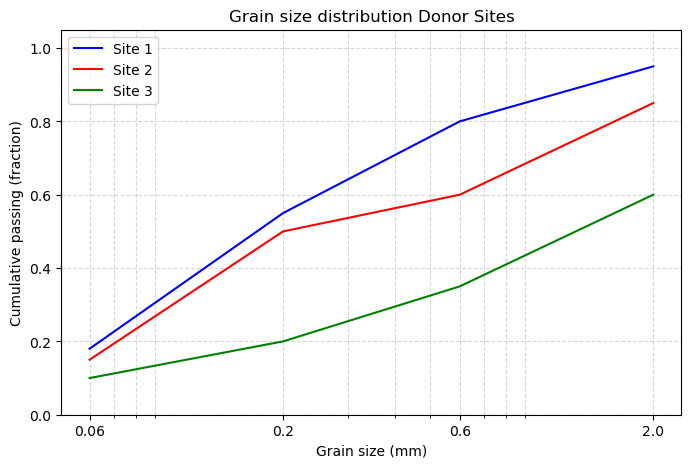

In [187]:
# passing %
sizes = np.array([0.06, 0.2, 0.6, 2.0])  # mm
site1 = np.array([0.18, 0.55, 0.8, 0.95])
site2 = np.array([0.15, 0.5, 0.6, 0.85])
site3 = np.array([0.1, 0.2, 0.35, 0.6])

# create smooth curves by interpolating in log-size space
sizes_plot = np.logspace(np.log10(0.04), np.log10(2.5), 300)
log_sizes = np.log10(sizes)
log_plot = np.log10(sizes_plot)

# y1 = np.interp(log_plot, log_sizes, site1)
# y2 = np.interp(log_plot, log_sizes, site2)
# y3 = np.interp(log_plot, log_sizes, site3)

plt.figure(figsize=(8,5))
# plt.plot(sizes_plot, y1, label='Site 1', lw=2)
# plt.plot(sizes_plot, y2, label='Site 2', lw=2)
# plt.plot(sizes_plot, y3, label='Site 3', lw=2)

# show original data points
plt.plot(sizes, site1, 'b') # color=plt.gca().lines[-3].get_color())
plt.plot(sizes, site2, 'r') # color=plt.gca().lines[-2].get_color())
plt.plot(sizes, site3, 'g') # color=plt.gca().lines[-1].get_color())

plt.xscale('log')
plt.legend(['Site 1', 'Site 2', 'Site 3'])
plt.xlabel('Grain size (mm)')
plt.ylabel('Cumulative passing (fraction)')
plt.title('Grain size distribution Donor Sites')
plt.xticks([0.06, 0.2, 0.6, 2.0], ['0.06', '0.2', '0.6', '2.0'])
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.ylim(0,1.05)
plt.show()

Training 4
- for TSHD offshore at site 3

In [224]:
density = {'clay': 1800, 'sand basin': 2000, 'cemented sand': 2200, 'sand site 3': 2050}
fines = {'clay': 1.0, 'sand basin': 0.35, 'cemented sand': 0.04, 'sand site 3': 0.10}

overflow = pd.DataFrame()
overflow['Soil'] =['clay', 'sand basin', 'cemented sand','sand site 3', ]
overflow['site'] = ['basin to offshore', 'basin to land reclamation', 'basin to land reclamation', 'offshore drag head + overflow to land reclamation', ]
overflow['Equipment'] = ['CSD to barge', 'CSD to barge', 'CSD to barge', 'TSHD to land reclamation', ]
overflow['in-situ vol [m3]'] = [basin_Clay_vol, basin_Sand_vol, basin_Cemented_Sand_vol, reclam_vol_after_basinsand_Csand]
overflow['production [m3/week]'] = [319200, 319200, 72800, 0]
overflow['density'] =  overflow['Soil'].map(density)
overflow['fines'] =  overflow['Soil'].map(fines)
overflow['sigma_dredge'] = [0.05,0.05,0.05,0.165]
overflow['sigma_place'] =[0.08,0.08, 0.08, 0.08]


display(overflow)

,Soil,site,Equipment,in-situ vol [m3],production [m3/week],density,fines,sigma_dredge,sigma_place
0,clay,basin to offshore,CSD to barge,"311,196.0",319200,1800,1.0,0.05,0.08
1,sand basin,basin to land reclamation,CSD to barge,"461,691.0",319200,2000,0.35,0.05,0.08
2,cemented sand,basin to land reclamation,CSD to barge,"227,923.0",72800,2200,0.04,0.05,0.08
3,sand site 3,offshore drag head + overflow to land reclamation,TSHD to land reclamation,"355,243.1",0,2050,0.1,0.165,0.08


overflow ratio (RO). And plot this ratio from start overflowing (t1 ) to a maximum overflow duration (t2.max) for both the BHD with barge and TSHD Function 4.4a uses the time at which overflow starts ( 
t1) and the time overflow is stopped (t2). The maximum duration of the overflow is often also stated as (t2),

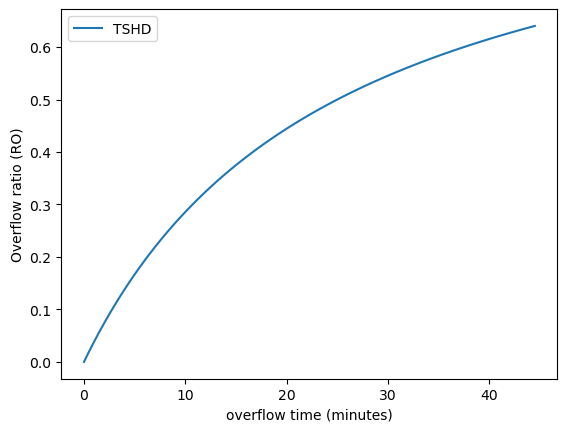

In [225]:
def calc_R0(t0,t1,t2): # a more practical version is used later on. Note that 0 should be O, for _O_verflow
    return(t2-t1)/(t2-t0)

R0_TSHD = []
Toa_TSHD = np.arange(0,45,0.5)
  
for toa in Toa_TSHD:
    R0_TSHD.append( calc_R0(0,25,25+toa) )

plt.plot(Toa_TSHD,R0_TSHD, label = 'TSHD');
plt.legend();
plt.xlabel('overflow time (minutes)')
plt.ylabel('Overflow ratio (RO)');

dry mass of fines in soil

In [226]:
def calc_dry_dens(rho_situ, rho_s, rho_w, Srw):
    n = (rho_situ-rho_s)/(Srw*rho_w-rho_s)
    return (1-n)*rho_s

rho_s = 2650
rho_w = 1025
Srw = 1
overflow['dry density'] = round((1-(overflow['density']- rho_s)/(Srw*rho_w-rho_s))*rho_s,2)
#overflow['dry density'] = overflow.apply(lambda row: calc_dry_dens(rho_situ = row['density'], rho_s = 2650, rho_w = 1025, Srw  =1), axis = 1)

overflow['mt'] = round(overflow['dry density']*overflow['in-situ vol [m3]']*overflow['fines']/1000,2)

display(overflow)

,Soil,site,Equipment,in-situ vol [m3],production [m3/week],density,fines,sigma_dredge,sigma_place,dry density,mt
0,clay,basin to offshore,CSD to barge,"311,196.0",319200,1800,1.0,0.05,0.08,"1,263.85","393,305.06"
1,sand basin,basin to land reclamation,CSD to barge,"461,691.0",319200,2000,0.35,0.05,0.08,"1,590.0","256,931.04"
2,cemented sand,basin to land reclamation,CSD to barge,"227,923.0",72800,2200,0.04,0.05,0.08,"1,916.15","17,469.39"
3,sand site 3,offshore drag head + overflow to land reclamation,TSHD to land reclamation,"355,243.1",0,2050,0.1,0.165,0.08,"1,671.54","59,380.31"


dry fines entering hopper

In [227]:
overflow['md'] = round(overflow['sigma_dredge'] * overflow['mt'],2)
overflow['mh'] = round(overflow['mt'] - overflow['md'],2)
display(overflow)

,Soil,site,Equipment,in-situ vol [m3],production [m3/week],density,fines,sigma_dredge,sigma_place,dry density,mt,md,mh
0,clay,basin to offshore,CSD to barge,"311,196.0",319200,1800,1.0,0.05,0.08,"1,263.85","393,305.06","19,665.25","373,639.81"
1,sand basin,basin to land reclamation,CSD to barge,"461,691.0",319200,2000,0.35,0.05,0.08,"1,590.0","256,931.04","12,846.55","244,084.49"
2,cemented sand,basin to land reclamation,CSD to barge,"227,923.0",72800,2200,0.04,0.05,0.08,"1,916.15","17,469.39",873.47,"16,595.92"
3,sand site 3,offshore drag head + overflow to land reclamation,TSHD to land reclamation,"355,243.1",0,2050,0.1,0.165,0.08,"1,671.54","59,380.31","9,797.75","49,582.56"


mass of fines overflowing
- in hopper settlement of 0.25
- trapping factor 0.05

mh: 16595.92 ton


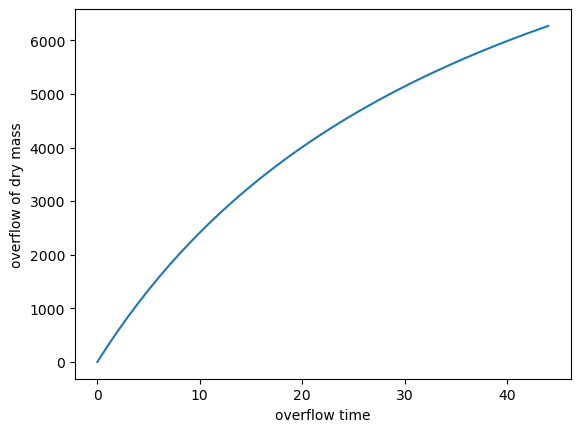

In [228]:
def calc_mo(t0,t1,t2,f_set,f_trap,mh):   
    return (t2-t1)/(t2-t0)*(1-f_set)*(1-f_trap)*mh

mh = overflow['mh'].values.tolist()[2]
print('mh:', mh, 'ton')

t1 = 39
mo_serie = []
toa_range = np.arange(0,45,1)

for toa in toa_range:
    mo_serie.append(calc_mo(t0=0,t1=t1,t2=t1+toa,f_set = 0.25,f_trap = 0.05,mh = mh))
    
plt.plot(toa_range, mo_serie);
plt.xlabel('overflow time')
plt.ylabel('overflow of dry mass');
# question why is this curve convex (mountain) and not concave (hole)? much more overflowing should happen in time while the hopper gets filled in,
# it is because of the simplification with teh settling and trapping factors are fixed for different overflowing time horizons, 
# in practice if the hopper remains the same the factors should change.

mh: 16595.92 ton


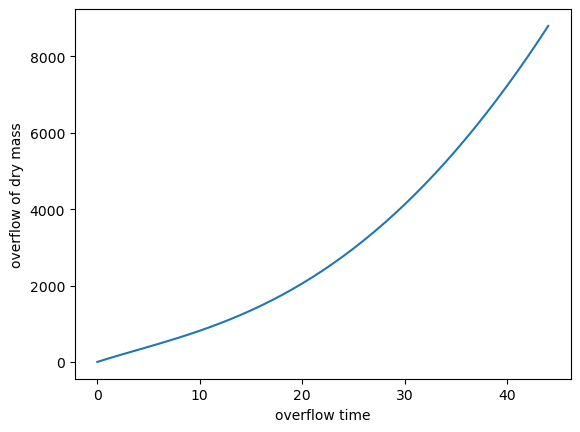

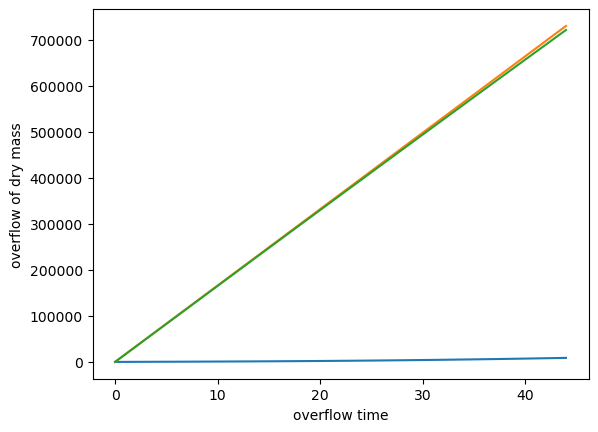

In [229]:
# we make f_set and f_trap change in time
def calc_mo(t0,t1,t2,f_set,f_trap,mh):   
    return (t2-t1)/(t2-t0)*(1-f_set)*(1-f_trap)*mh

mh = overflow['mh'].values.tolist()[2]
print('mh:', mh, 'ton')

t1 = 39
mo_serie = []
toa_range = np.arange(0,45,1)

for toa in toa_range:
    mo_serie.append(calc_mo(t0=0,t1=t1,t2=t1+toa,f_set = 0.8-0.8*toa*toa/(toa_range.max()*toa_range.max()),f_trap = 0,mh = mh))
    
plt.plot(toa_range, mo_serie);
#plt.plot(toa_range,((np.ones_like(toa_range)*mh).cumsum()-mh))
#plt.plot(toa_range,((np.ones_like(toa_range)*mh).cumsum()-mh-mo_serie))
plt.xlabel('overflow time')
plt.ylabel('overflow of dry mass');
plt.figure()
plt.plot(toa_range, np.array(mo_serie));
plt.plot(toa_range,((np.ones_like(toa_range)*mh).cumsum()-mh))
plt.plot(toa_range,((np.ones_like(toa_range)*mh).cumsum()-mh-mo_serie))
plt.xlabel('overflow time')
plt.ylabel('overflow of dry mass');

In [230]:
t1_project = {'CSD':0.01, 'CSD':0.01,'CSD':0.01, 'TSHD':39}
t2_project = {'CSD':0.01, 'CSD':0.01,'CSD':0.01,'TSHD':45,}

overflow['t1'] =  overflow['Equipment'].map(t1_project)
overflow['t2'] =  overflow['Equipment'].map(t2_project)

# overflow['mo'] = round((overflow['t2']-overflow['t1'])/(overflow['t2']-0)*(1-0.25)*(1-0.05)*overflow['mh'] ,2)
# display(overflow)

# # print(overflow

In [231]:
# Fix mapping: keys must match overflow['Equipment'] values (or use substring matching)
t1_map = {'CSD to barge': 0.01, 'TSHD to land reclamation': 39}
t2_map = {'CSD to barge': 0.01, 'TSHD to land reclamation': 45}

overflow['t1'] = overflow['Equipment'].map(t1_map)
overflow['t2'] = overflow['Equipment'].map(t2_map)

# Fallback: if any rows still NaN, set by substring
mask_nan = overflow['t1'].isna() | overflow['t2'].isna()
if mask_nan.any():
    overflow.loc[overflow['Equipment'].str.contains('CSD', na=False), ['t1','t2']] = [0.01, 0.01]
    overflow.loc[overflow['Equipment'].str.contains('TSHD', na=False), ['t1','t2']] = [39, 45]

# Vectorized recomputation of mo (same formula used previously)
overflow['mo'] = ((overflow['t2'] - overflow['t1']) / (overflow['t2'] - 0)
                  * (1 - 0.25) * (1 - 0.05) * overflow['mh']).round(2)

display(overflow)

,Soil,site,Equipment,in-situ vol [m3],production [m3/week],density,fines,sigma_dredge,sigma_place,dry density,mt,md,mh,t1,t2,mo
0,clay,basin to offshore,CSD to barge,"311,196.0",319200,1800,1.0,0.05,0.08,"1,263.85","393,305.06","19,665.25","373,639.81",0.01,0.01,0.0
1,sand basin,basin to land reclamation,CSD to barge,"461,691.0",319200,2000,0.35,0.05,0.08,"1,590.0","256,931.04","12,846.55","244,084.49",0.01,0.01,0.0
2,cemented sand,basin to land reclamation,CSD to barge,"227,923.0",72800,2200,0.04,0.05,0.08,"1,916.15","17,469.39",873.47,"16,595.92",0.01,0.01,0.0
3,sand site 3,offshore drag head + overflow to land reclamation,TSHD to land reclamation,"355,243.1",0,2050,0.1,0.165,0.08,"1,671.54","59,380.31","9,797.75","49,582.56",39.0,45.0,"4,710.34"


Retained Soil (mr)

In [232]:
overflow['mr'] = round(overflow['mh'] - overflow['mo'],2)
display(overflow)

,Soil,site,Equipment,in-situ vol [m3],production [m3/week],density,fines,sigma_dredge,sigma_place,dry density,mt,md,mh,t1,t2,mo,mr
0,clay,basin to offshore,CSD to barge,"311,196.0",319200,1800,1.0,0.05,0.08,"1,263.85","393,305.06","19,665.25","373,639.81",0.01,0.01,0.0,"373,639.81"
1,sand basin,basin to land reclamation,CSD to barge,"461,691.0",319200,2000,0.35,0.05,0.08,"1,590.0","256,931.04","12,846.55","244,084.49",0.01,0.01,0.0,"244,084.49"
2,cemented sand,basin to land reclamation,CSD to barge,"227,923.0",72800,2200,0.04,0.05,0.08,"1,916.15","17,469.39",873.47,"16,595.92",0.01,0.01,0.0,"16,595.92"
3,sand site 3,offshore drag head + overflow to land reclamation,TSHD to land reclamation,"355,243.1",0,2050,0.1,0.165,0.08,"1,671.54","59,380.31","9,797.75","49,582.56",39.0,45.0,"4,710.34","44,872.22"


Fines released during overflow
The majority of the mass that overflow descends to the bed as a dynamic plume. An emperical fraction (σ0 ) does end up in a passive flume. 
- Assume σ0  = 0.15, how much of the mass ends up at the bed ($m_od$ = mass overflow dynamic) and how much ends up in the plume ($m_op$= mass overflow passive)

In [233]:
sigma_0 = 0.15
overflow['m_od'] = round( (1-sigma_0)*overflow['mo'] ,2)
overflow['m_op'] = round( sigma_0*overflow['mo'] ,2)
display(overflow)


,Soil,site,Equipment,in-situ vol [m3],production [m3/week],density,fines,sigma_dredge,sigma_place,dry density,mt,md,mh,t1,t2,mo,mr,m_od,m_op
0,clay,basin to offshore,CSD to barge,"311,196.0",319200,1800,1.0,0.05,0.08,"1,263.85","393,305.06","19,665.25","373,639.81",0.01,0.01,0.0,"373,639.81",0.0,0.0
1,sand basin,basin to land reclamation,CSD to barge,"461,691.0",319200,2000,0.35,0.05,0.08,"1,590.0","256,931.04","12,846.55","244,084.49",0.01,0.01,0.0,"244,084.49",0.0,0.0
2,cemented sand,basin to land reclamation,CSD to barge,"227,923.0",72800,2200,0.04,0.05,0.08,"1,916.15","17,469.39",873.47,"16,595.92",0.01,0.01,0.0,"16,595.92",0.0,0.0
3,sand site 3,offshore drag head + overflow to land reclamation,TSHD to land reclamation,"355,243.1",0,2050,0.1,0.165,0.08,"1,671.54","59,380.31","9,797.75","49,582.56",39.0,45.0,"4,710.34","44,872.22","4,003.79",706.55


Fines released during disposal, after overflow
- $m_{pp}$ mass of static passive plume and how much sinks to the bottom 
- $m_{pd}$ is the mass plume from the density-driven current 

In [234]:
overflow['m_pp'] = round ( overflow['sigma_place'] *  overflow['mr'] , 2)
overflow['m_pd'] = round (( 1 - overflow['sigma_place']) *  overflow['mr'] ,2)
display(overflow)

,Soil,site,Equipment,in-situ vol [m3],production [m3/week],density,fines,sigma_dredge,sigma_place,dry density,mt,md,mh,t1,t2,mo,mr,m_od,m_op,m_pp,m_pd
0,clay,basin to offshore,CSD to barge,"311,196.0",319200,1800,1.0,0.05,0.08,"1,263.85","393,305.06","19,665.25","373,639.81",0.01,0.01,0.0,"373,639.81",0.0,0.0,"29,891.18","343,748.63"
1,sand basin,basin to land reclamation,CSD to barge,"461,691.0",319200,2000,0.35,0.05,0.08,"1,590.0","256,931.04","12,846.55","244,084.49",0.01,0.01,0.0,"244,084.49",0.0,0.0,"19,526.76","224,557.73"
2,cemented sand,basin to land reclamation,CSD to barge,"227,923.0",72800,2200,0.04,0.05,0.08,"1,916.15","17,469.39",873.47,"16,595.92",0.01,0.01,0.0,"16,595.92",0.0,0.0,"1,327.67","15,268.25"
3,sand site 3,offshore drag head + overflow to land reclamation,TSHD to land reclamation,"355,243.1",0,2050,0.1,0.165,0.08,"1,671.54","59,380.31","9,797.75","49,582.56",39.0,45.0,"4,710.34","44,872.22","4,003.79",706.55,"3,589.78","41,282.44"


total fines when 6 mins overflowing

In [235]:

overflow['m_fines_total'] = round( overflow['md'] + overflow['m_op'] + overflow['m_pp'] ,2)
print('the total mass of fines suspended is: ',round( np.sum(overflow['m_fines_total'].values.tolist()) ,3) , 'ton')

the total mass of fines suspended is:  98224.96 ton


Dredge duration excluding barges and wave conditions

In [236]:
# the total mass that has to be dredged is from the in-situ soil and that from the overflow that sinks to the bed (mod).
overflow['m_dredge'] =  round( overflow['in-situ vol [m3]'] + overflow['m_od'] ,2)
overflow['duration [wk]'] = round( overflow['m_dredge'] / overflow['production [m3/week]'] ,2)
display(overflow)

,Soil,site,Equipment,in-situ vol [m3],production [m3/week],density,fines,sigma_dredge,sigma_place,dry density,mt,md,mh,t1,t2,mo,mr,m_od,m_op,m_pp,m_pd,m_fines_total,m_dredge,duration [wk]
0,clay,basin to offshore,CSD to barge,"311,196.0",319200,1800,1.0,0.05,0.08,"1,263.85","393,305.06","19,665.25","373,639.81",0.01,0.01,0.0,"373,639.81",0.0,0.0,"29,891.18","343,748.63","49,556.43","311,196.0",0.97
1,sand basin,basin to land reclamation,CSD to barge,"461,691.0",319200,2000,0.35,0.05,0.08,"1,590.0","256,931.04","12,846.55","244,084.49",0.01,0.01,0.0,"244,084.49",0.0,0.0,"19,526.76","224,557.73","32,373.31","461,691.0",1.45
2,cemented sand,basin to land reclamation,CSD to barge,"227,923.0",72800,2200,0.04,0.05,0.08,"1,916.15","17,469.39",873.47,"16,595.92",0.01,0.01,0.0,"16,595.92",0.0,0.0,"1,327.67","15,268.25","2,201.14","227,923.0",3.13
3,sand site 3,offshore drag head + overflow to land reclamation,TSHD to land reclamation,"355,243.1",0,2050,0.1,0.165,0.08,"1,671.54","59,380.31","9,797.75","49,582.56",39.0,45.0,"4,710.34","44,872.22","4,003.79",706.55,"3,589.78","41,282.44","14,094.08","359,246.89",inf


Release of fines

In [237]:
overflow['fines [ton/week]'] = round (overflow['m_fines_total'] / overflow['duration [wk]'] , 3)
overflow['fines [kg/s]'] = round (overflow['fines [ton/week]']/100/3600*1000, 5)
display(overflow)

,Soil,site,Equipment,in-situ vol [m3],production [m3/week],density,fines,sigma_dredge,sigma_place,dry density,mt,md,mh,t1,t2,mo,mr,m_od,m_op,m_pp,m_pd,m_fines_total,m_dredge,duration [wk],fines [ton/week],fines [kg/s]
0,clay,basin to offshore,CSD to barge,"311,196.0",319200,1800,1.0,0.05,0.08,"1,263.85","393,305.06","19,665.25","373,639.81",0.01,0.01,0.0,"373,639.81",0.0,0.0,"29,891.18","343,748.63","49,556.43","311,196.0",0.97,"51,089.103",141.91418
1,sand basin,basin to land reclamation,CSD to barge,"461,691.0",319200,2000,0.35,0.05,0.08,"1,590.0","256,931.04","12,846.55","244,084.49",0.01,0.01,0.0,"244,084.49",0.0,0.0,"19,526.76","224,557.73","32,373.31","461,691.0",1.45,"22,326.421",62.01784
2,cemented sand,basin to land reclamation,CSD to barge,"227,923.0",72800,2200,0.04,0.05,0.08,"1,916.15","17,469.39",873.47,"16,595.92",0.01,0.01,0.0,"16,595.92",0.0,0.0,"1,327.67","15,268.25","2,201.14","227,923.0",3.13,703.24,1.95344
3,sand site 3,offshore drag head + overflow to land reclamation,TSHD to land reclamation,"355,243.1",0,2050,0.1,0.165,0.08,"1,671.54","59,380.31","9,797.75","49,582.56",39.0,45.0,"4,710.34","44,872.22","4,003.79",706.55,"3,589.78","41,282.44","14,094.08","359,246.89",inf,0.0,0.0


*VERY HIGH SOURCE TERMS FOR MASS SOURCE IN KG/S*

 Concentrations for EIR

In [238]:
def calc_C(x, y, M, L_Z, u, D_Y, x_0 = 0, y_0 = 0):
    numerator = M/L_Z
    denominator = u*(4*np.pi*D_Y*(x-x_0)/u)**0.5
    exponent = np.exp((u*(y-y_0)**2)/(4*D_Y*(x-x_0)))

    return numerator / denominator * exponent

In [239]:
print('Start answer, do not delete cell above.')

# Applying the function to create a new column
overflow['fines seagrass [kg/m3]'] = overflow.apply(lambda row: calc_C(x = 1000, y = 4, M = row['fines [kg/s]'], L_Z = 10, u = 1, D_Y = 0.7), axis=1).round(3)
overflow['fines seagrass [mg/l]'] = (overflow['fines seagrass [kg/m3]']*1000).round(3)

# overflow = overflow.round({'fines [kg/s]': 4 ,'fines reef [kg/m3]': 5, 'fines reef [mg/l]': 5})

display(overflow)

Start answer, do not delete cell above.


,Soil,site,Equipment,in-situ vol [m3],production [m3/week],density,fines,sigma_dredge,sigma_place,dry density,mt,md,mh,t1,t2,mo,mr,m_od,m_op,m_pp,m_pd,m_fines_total,m_dredge,duration [wk],fines [ton/week],fines [kg/s],fines seagrass [kg/m3],fines seagrass [mg/l]
0,clay,basin to offshore,CSD to barge,"311,196.0",319200,1800,1.0,0.05,0.08,"1,263.85","393,305.06","19,665.25","373,639.81",0.01,0.01,0.0,"373,639.81",0.0,0.0,"29,891.18","343,748.63","49,556.43","311,196.0",0.97,"51,089.103",141.91418,0.152,152.0
1,sand basin,basin to land reclamation,CSD to barge,"461,691.0",319200,2000,0.35,0.05,0.08,"1,590.0","256,931.04","12,846.55","244,084.49",0.01,0.01,0.0,"244,084.49",0.0,0.0,"19,526.76","224,557.73","32,373.31","461,691.0",1.45,"22,326.421",62.01784,0.067,67.0
2,cemented sand,basin to land reclamation,CSD to barge,"227,923.0",72800,2200,0.04,0.05,0.08,"1,916.15","17,469.39",873.47,"16,595.92",0.01,0.01,0.0,"16,595.92",0.0,0.0,"1,327.67","15,268.25","2,201.14","227,923.0",3.13,703.24,1.95344,0.002,2.0
3,sand site 3,offshore drag head + overflow to land reclamation,TSHD to land reclamation,"355,243.1",0,2050,0.1,0.165,0.08,"1,671.54","59,380.31","9,797.75","49,582.56",39.0,45.0,"4,710.34","44,872.22","4,003.79",706.55,"3,589.78","41,282.44","14,094.08","359,246.89",inf,0.0,0.0,0.0,0.0


4.3.3) Spill by CSD in basin deepening
- sand
- clay
- cemented sand

Sand will be disposed of in land reclamation and clay & cemented sand will be disposed of offshore

- sigma 1 for CSD 0.05  Becker 2015
- sigma 2 for clay/sand dumped with barges =0.08 (hydraulic bottom door) Becker 2015

In [240]:
#f=%mass that is fines  
#sig1= during excavation the % of fines entrained from cutter (Becker 2015)
#sig2 = % of fines released during disposal (from becker 2015)

s_CSD_Sand1 = Spillage_basin(basin_Sand_vol, dry_dens_sand, f=0.35, sig1 = 0.05, sig2 = 0.08)  
s_CSD_Clay1 = Spillage_basin(basin_Clay_vol, dry_dens_clay, f=1, sig1 = 0.05, sig2 = 0.08) # *0.1 for bubble efficiency of bubble screen and 0.9 for CSD cut ratio
s_CSD_cementedsand1 = Spillage_basin(basin_Cemented_Sand_vol, dry_dens_cemented_sand, f=0.04, sig1 = 0.05, sig2 = 0.08) #4% FINES # *0.9 for CSD cut ratio

print('CSD Sand spillage in basin:', s_CSD_Sand1[0]*0.9*0.1, 'ton, to land reclamation:', s_CSD_Sand1[1], 'ton')
print('CSD Clay spillage in basin:', f'{s_CSD_Clay1[0]*0.9 *0.1:.2f}', 'ton, offshore site:', f'{s_CSD_Clay1[1]:.2f}', 'ton') 
print('CSD Cemented Sand spillage in basin:', f'{s_CSD_cementedsand1[0]*0.9:.2f}', 'ton, offshore site:', f'{s_CSD_cementedsand1[1]:.2f}', 'ton') 
print('ton, offshore site number also present in barge spillage above in section 4.3.1')

CSD Sand spillage in basin: 1156.18968675 ton, to land reclamation: 20554.483319999996 ton
CSD Clay spillage in basin: 1769.87 ton, offshore site: 31464.31 ton
CSD Cemented Sand spillage in basin: 919.93 ton, offshore site: 1635.44 ton
ton, offshore site number also present in barge spillage above in section 4.3.1


In [242]:
# create a summary table of CSD spillage (values are in tons) in Basin and offshore
rows = ['Sand', 'Clay', 'Cemented sand']
data = {
    'Basin (s1) [ton]': [s_CSD_Sand1[0]*0.9*0.1, s_CSD_Clay1[0]*0.1*0.9, s_CSD_cementedsand1[0]*0.9],
    'Offshore (s2) [ton]': [s_CSD_Sand1[1], s_CSD_Clay1[1], s_CSD_cementedsand1[1]],
    'Total [ton]': [s_CSD_Sand1[2], s_CSD_Clay1[2], s_CSD_cementedsand1[2]],
}

df_spillage = pd.DataFrame(data, index=rows)
# round for readability
df_spillage = df_spillage.round(0).astype(int)

display(df_spillage)

,Basin (s1) [ton],Offshore (s2) [ton],Total [ton]
Sand,694,15416,23124
Clay,1062,23598,35397
Cemented sand,552,1227,1840


4.3.2) TSHD
  - sig1 = 0.015 (draghead) + 0.15 (overflow intial discharge) = 0.165
  - sig 2 = 0.08 rainbowing
  - fines = 0.1 at site 3

In [248]:
def Spillage_basin(vol_situ, dry_dens,f, sig1, sig2):# f is fraction fines, sig1 is fraction spillage excavation, sig2 is fraction spillage disposal
    mass = vol_situ * dry_dens/1000 *f # mass [ton] excavation
    s1 = mass * sig1 # spillage excavation
    mass2 = mass# mass [ton ]disposed, the same as mass 1 since spillage has to be re-excavated
    s2 = mass2 * sig2# spillage disposal
    return s1, s2, s1 + s2

def Spillage_channel(vol_situ, dry_dens,f, sig1, sig2):# f is fraction fines, sig1 is fraction spillage excavation, sig2 is fraction spillage disposal
    mass = vol_situ * dry_dens/1000 *f # mass [ton] excavation
    s1 = mass * sig1 # spillage excavation
    mass2 = mass - s1 # mass [ton ]disposed
    s2 = mass2 * sig2# spillage disposal
    return s1, s2, s1 + s2

# s_TSHD1 = Spillage_basin(748000, 1263.85, 1,0.015, 0.08)
# print('Clay spillage: in basin', round(s_TSHD1[0],0), 'ton, at disposal site:', round(s_TSHD1[1],0), 'ton')

s_TSHD2 = Spillage_channel(reclam_vol_after_basinsand_Csand, rho_excav, 0.10,0.165, 0.08)  #Assume a spillage of 16.5% near the draghead+overflow and 8% for rainbowing
print('Sand spillage TSHD in channel:', round(s_TSHD2[0],0), 'and sand rainbowed for beach reclamation:', round(s_TSHD2[1],0), 'ton')
# print('Sand spillage TSHD: in channel', round(s_TSHD2[0],0), 'ton, at disposal site:', round(s_TSHD2[1],0), 'ton')

Sand spillage TSHD in channel: 11137.0 and sand rainbowed for beach reclamation: 4509.0 ton


Environmental Impact Assessment
- dredge source assumed steady and continuous
- depth avg concentration
- diffusion in x negligible compared to advective transport in x

CSD basin plume

In [290]:
#BASIN PLUME via CSD

Basinspill_volclay = s_CSD_Clay1[0]*0.9 *0.1  #fines in kg/s   *0.1 for bubble screen efficiency and 0.9 for CSD cut ratio
Basinspill_volcemsand = s_CSD_cementedsand1[0]*0.9  #fines in kg/s NO BUBBLE CURTAIN FOR CEMENTED SAND

timeclay = 266/60 * 117   #hours of dredging with CSD       hr/cycle time * number of cycles
timecementedsand = 172/60 *152 #hours of dredging with CSD   hr/cycle time * number of cycles
M_clay = Basinspill_volclay * 1e3 / timeclay / 3600   #mass release rate in kg/s
M_cemsand = Basinspill_volcemsand * 1e3 / timecementedsand / 3600   #mass release rate in kg/s
L = 10     #depth of water column (m)
u =  1     #current speed in m/s
Dy = 0.7   #lateral dispersion coefficient in m2/s
x0 = 0     #release location x-coordinate
x = 500   #receptor location x-coordinate (m)
y0 = 0     #release location y-coordinate
y = 1      #receptor location y-coordinate (m)

c_clay = (M_clay / L) / (u * np.sqrt(4 * np.pi * Dy * (x-x0 / u))) * np.exp( u * (y-y0)**2 / (4 * Dy * (x-x0)) ) * 1000 #concentration in mg/L
c_cemsand = (M_cemsand / L) / (u * np.sqrt(4 * np.pi * Dy * (x-x0 / u))) * np.exp( u * (y-y0)**2 / (4 * Dy * (x-x0)) ) * 1000 #concentration in mg/L

print('Concentration at', x, 'm from source (basin deepening clay):', round(c_clay,2), 'g/L')
print('Concentration at', x, 'm from source (basin deepening cemented sand):', round(c_cemsand,2), 'g/L')
#BASIN MATERIAL DUMPING PLUME via barges
offshorespill_volclay = s_CSD_Clay1[1]    #fines in kg/s   
offshorespill_volcemsand = s_CSD_cementedsand1[1]  #fines in kg/s



Concentration at 500 m from source (basin deepening clay): 0.86 g/L
Concentration at 500 m from source (basin deepening cemented sand): 0.53 g/L


Clay dumping plume

In [294]:
timeclay = 30/60*117   #hours of dredging with CSD       hr/cycle time * number of cycles
timecementedsand = 30/60*152 #hours of dredging with CSD   hr/cycle time * number of cycles                                                             GUESS! CHANGE LATER
M_offshore_clay = offshorespill_volclay * 1e3 / timeclay / 3600   #mass release rate in kg/s
M_offshore_cemsand = offshorespill_volcemsand * 1e3 / timecementedsand / 3600   #mass release rate in kg/s
L = 4     #depth of water column (m)
u =  0.5     #current speed in m/s
Dy = 0.7   #lateral dispersion coefficient in m2/s
x0 = 0     #release location x-coordinate
x = 10  #receptor location x-coordinate (m)
y0 = 0     #release location y-coordinate
y = 1     #receptor location y-coordinate (m)

c_off_clay = (M_offshore_clay / L) / (u * np.sqrt(4 * np.pi * Dy * (x-x0 / u))) * np.exp( u * (y-y0)**2 / (4 * Dy * (x-x0)) ) * 1000 #concentration in mg/L
c_off_cemsand = (M_offshore_cemsand / L) / (u * np.sqrt(4 * np.pi * Dy * (x-x0 / u))) * np.exp( u * (y-y0)**2 / (4 * Dy * (x-x0)) ) * 1000 #concentration in mg/L

print('Concentration at', x, 'm from source (basin deepening clay):', round(c_off_clay,2), 'mg/L')
print('Concentration at', x, 'm from source (basin deepening cemented sand):', round(c_off_cemsand,2), 'mg/L')

Concentration at 10 m from source (basin deepening clay): 6081.24 mg/L
Concentration at 10 m from source (basin deepening cemented sand): 243.3 mg/L


TSHD plume offshore

In [301]:
timesandoff = 150/60*152 #hours of dredging with CSD   hr/cycle time * number of cycles       #CHANGE HOURS LATER                   
M_offshore_sand = offshorespill_volcemsand * 1e3 / timesandoff / 3600   #mass release rate in kg/s
L = 20     #depth of water column (m)
u =  1.0     #current speed in m/s
Dy = 0.7   #lateral dispersion coefficient in m2/s
x0 = 0     #release location x-coordinate
x = 10500  #receptor location x-coordinate (m)
y0 = 0     #release location y-coordinate
y = 1     #receptor location y-coordinate (m)

c_off_sand = (M_offshore_sand / L) / (u * np.sqrt(4 * np.pi * Dy * (x-x0 / u))) * np.exp( u * (y-y0)**2 / (4 * Dy * (x-x0)) ) * 1000 #concentration in mg/L

print('Concentration at', x, 'm from source (offshore sand TSHD):', round(c_off_sand,2), 'mg/L')

Concentration at 10500 m from source (offshore sand TSHD): 0.15 mg/L


TSHD plume in port after dumping

In [311]:
timesandoff = 45/60*152 #hours of dredging with CSD   hr/cycle time * number of cycles       #CHANGE HOURS LATER                   
M_offshore_sand = offshorespill_volcemsand * 1e3 / timesandoff / 3600   #mass release rate in kg/s
L = 4     #depth of water column (m)
u =  0.5     #current speed in m/s
Dy = 0.7   #lateral dispersion coefficient in m2/s
x0 = 0     #release location x-coordinate
x = 500  #receptor location x-coordinate (m)
y0 = 0     #release location y-coordinate
y = 1     #receptor location y-coordinate (m)

c_off_sand = ((M_offshore_sand / L) / (u * np.sqrt(4 * np.pi * Dy * (x-x0 / u))) * np.exp( u * (y-y0)**2 / (4 * Dy * (x-x0)) ) * 1000) * (1-0.9) * (1-0.75)      #concentration in mg/L with bubble screen & silt screen

print('Concentration at', x, 'm from source (offshore sand TSHD):', round(c_off_sand,2), 'mg/L')

Concentration at 500 m from source (offshore sand TSHD): 0.56 mg/L


Soil Compaction

In [402]:
soil = pd.DataFrame()
soil['soil type [m]'] = ['sand offshore','cemented sand basin', 'sand basin']
soil['thickness [m]'] = [1.7,1.1,2.2]


z_mid_serie = []
avg_water_depth = []
avg_total_pressure = []
density = []
# soil['density [kg/m3]'] = [1900,2000,2000]                                  #DISCUSS WITH RIFA
z = -2.0 # groundlevel, positive value downwards, compared to MSL
P = 0 # total pressure at z
for i in range(len(soil)):
    z_mid = z + soil['thickness [m]'][i]/2# midpoint of the considered layer
    z = z + soil['thickness [m]'][i] # bottom of the considered layer (used in the next loop)
    
    z_mid_serie.append(z_mid)
    
    if z > 0:
        avg_water_depth.append(z_mid)
        density.append(1900)
    else:
        avg_water_depth.append(0)
        density.append(2000)
    
    delta_P = soil['thickness [m]'][i] * density[-1] * 9.81# pressure difference between top and bottom of the layer, using the last added density
    P += delta_P # pressure at the bottom of the layer
    avg_total_pressure.append( (P-0.5*delta_P)/1000)#pressure half layer up, and to kPa
    # print('z-location:', z,'m, soil pressure', P, 'kPa')
        
soil['midpoint z-axis [m]'] = z_mid_serie
soil['avg water depth [m]'] = avg_water_depth
# soil['density [kg/m3]'] = soil['density [kg/m3]']
soil['avg total pressure [kPa]'] = avg_total_pressure
soil['avg water pressure [kPa]'] = soil['avg water depth [m]']*1025*9.81 / 1000
soil['avg effective stress [kPa]'] = soil['avg total pressure [kPa]'] - soil['avg water pressure [kPa]']
soil['Cone Resistance (qc) [kPa]'] = [6000,4000,3500]

soil = soil.round({'midpoint z-axis [m]':1, 'avg water depth [m]':1, 'avg total pressure [kPa]':1,'avg water pressure [kPa]': 1 ,'avg effective stress [kPa]': 1})
display(soil)

,soil type [m],thickness [m],midpoint z-axis [m],avg water depth [m],avg total pressure [kPa],avg water pressure [kPa],avg effective stress [kPa],Cone Resistance (qc) [kPa]
0,sand offshore,1.7,-1.2,0.0,16.7,0.0,16.7,6000
1,cemented sand basin,1.1,0.2,0.2,43.6,2.5,41.1,4000
2,sand basin,2.2,1.9,1.9,74.4,19.1,55.3,3500


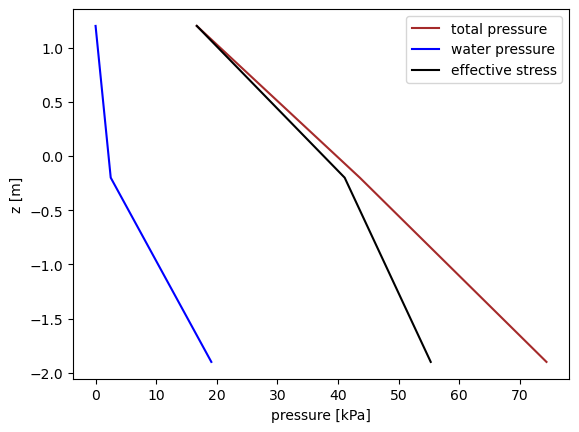

In [403]:
plt.plot(soil['avg total pressure [kPa]'],-soil['midpoint z-axis [m]'], label = 'total pressure', color = 'brown')
plt.plot(soil['avg water pressure [kPa]'],-soil['midpoint z-axis [m]'], label = 'water pressure', color = 'blue')
plt.plot(soil['avg effective stress [kPa]'],-soil['midpoint z-axis [m]'], label = 'effective stress', color = 'k')
plt.legend()
plt.ylabel('z [m]')
plt.xlabel('pressure [kPa]');

In [404]:
def calc_Dr(qc, sigma):
    return 1/2.41 * np.log(qc/(157*sigma**0.55))*100

soil['Relative density [%]'] = soil.apply(lambda row: calc_Dr(qc = row['Cone Resistance (qc) [kPa]'], sigma = row['avg effective stress [kPa]']), axis=1)

soil = soil.round({'Relative density [%]':2})
display(soil)

,soil type [m],thickness [m],midpoint z-axis [m],avg water depth [m],avg total pressure [kPa],avg water pressure [kPa],avg effective stress [kPa],Cone Resistance (qc) [kPa],Relative density [%]
0,sand offshore,1.7,-1.2,0.0,16.7,0.0,16.7,6000,86.92
1,cemented sand basin,1.1,0.2,0.2,43.6,2.5,41.1,4000,49.54
2,sand basin,2.2,1.9,1.9,74.4,19.1,55.3,3500,37.23


layer 0 highest density and above water. layer 1 and 2 lower density and placed via barges dumped. a pipeline would yield lower like 25%

In [405]:
soil['method'] = ['rainbow','dumping','dumping']
display(soil)

,soil type [m],thickness [m],midpoint z-axis [m],avg water depth [m],avg total pressure [kPa],avg water pressure [kPa],avg effective stress [kPa],Cone Resistance (qc) [kPa],Relative density [%],method
0,sand offshore,1.7,-1.2,0.0,16.7,0.0,16.7,6000,86.92,rainbow
1,cemented sand basin,1.1,0.2,0.2,43.6,2.5,41.1,4000,49.54,dumping
2,sand basin,2.2,1.9,1.9,74.4,19.1,55.3,3500,37.23,dumping


compaction needed to relative density exceeds 80%